# Test

- does the environment work?
- are packages imported?
- can we access the data?
- how is the data structured?
- how to import files in an efficient way?
- how to save numpy arrays?
- how to access saved numpy arrays?

In [8]:
import xarray as xr
import pop_tools
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

print('yay all installed <3')

yay all installed <3


In [ ]:
filename = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/bsf/bsf_1001.001.nc'
ds_bsf = xr.open_dataset(filename)

print('look at my pretty data')

ds_bsf

In [7]:
time = ds_bsf.time.values

print(time)

[cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0, has_year_zero=True) ...
 cftime.DatetimeNoLeap(2100, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2100, 12, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2101, 1, 1, 0, 0, 0, 0, has_year_zero=True)]


In [3]:
path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc'
files = glob.glob(path + '/*.nc')

# loop through list of files
for f in files:
    
    # print files names
    print(f)
    
    # read in nc files
    #ds_moc = xr.open_dataset(f)

/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1231.019.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1301.017.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1231.012.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1251.007.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1231.017.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1301.016.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1301.006.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1251.003.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1281.010.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1231.013.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1281.013.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1281.007.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1301.015.nc
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/moc_1251.004.nc
/Data/gfi/share/ModD

In [44]:
### INITIALISATION ###

import xarray as xr         # data handling
import glob                 # return all file paths that match a specific pattern
import ruptures as rpt      # for off-line change point detection

path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/moc/'
files = glob.glob(path + '/*.nc')

# length of time series
len_time = 3012

# prepare arrays and dictionaries to store files
time_series = np.zeros((len_time, len(files)))
arrays_dict = {} # Create a dictionary to store the arrays

### COMPUTATION ###

# loop through list of files
for i in range(2):
    # read in files
    ds_moc = xr.open_dataset(files[i])
    
    # compute maximum moc time series
    ds_max = ds_moc.MOC.isel(transport_reg=1, 
                             lat_aux_grid=slice(259,365), 
                             moc_z=slice(27, 51)
                            ).sum('moc_comp').max(('lat_aux_grid','moc_z'))
    # return numpy series
    signal = ds_max.values
    
    # compute change points
    algo_window = rpt.Window(model="rbf").fit(signal) 
    result = algo_window.fit_predict(signal, pen=40)
    
    # save signal to time series array
    time_series[:,i] = signal

    # Add the arra to the dictionary with a unique key
    key = f"array_{i}"
    arrays_dict[key] = result
    
### OUTPUT ###
    
# Save time series to a single file
np.save("moc_time_series.npy", time_series)
# Save all change point arrays containing to a single file
np.savez("moc_change_points.npz", **arrays_dict)

In [3]:
# Load the array from the file
data = np.load("moc_time_series.npy")
# Access the array
data[:,0]

array([24.7646656 , 25.51775932, 29.96545982, ..., 10.13521862,
       11.90265274,  9.95957565])

In [5]:
# Load all the arrays from the file
data = np.load("moc_change_points.npz")

for i in range(10):
    key = f"array_{i}"
    array = data[key]
    
    # Do something with the array
    print(f"Array {i} has shape {array.shape}")

Array 0 has shape (4,)
Array 1 has shape (6,)
Array 2 has shape (2,)
Array 3 has shape (2,)
Array 4 has shape (3,)
Array 5 has shape (3,)
Array 6 has shape (3,)
Array 7 has shape (4,)
Array 8 has shape (4,)
Array 9 has shape (4,)


In [3]:

import xarray as xr         # data handling
import glob                 # return all file paths that match a specific pattern

path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/bsf/'
files = glob.glob(path + '*.nc')
for i in range(len(files)):
    
    # read in files
    ds = xr.open_dataset(files[i])
    
    print(ds.BSF)

<xarray.DataArray 'BSF' (time: 3012, nlat: 384, nlon: 320)>
[370114560 values with dtype=float32]
Coordinates:
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Diagnostic barotropic streamfunction
    units:         Sv
    grid_loc:      2220
    cell_methods:  time: mean
<xarray.DataArray 'BSF' (time: 3012, nlat: 384, nlon: 320)>
[370114560 values with dtype=float32]
Coordinates:
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Diagnostic barotropic streamfunction
    units:         Sv
    grid_loc

In [3]:
path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/vvel/'
salt_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/salt/'
temp_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/'
files = glob.glob(path + '*.nc')

In [11]:
glob.glob(salt_path + '*' + files[0][-11:])

['/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/salt/salt_1301.019.nc']

'1301.019.nc'

In [2]:
#!/usr/bin/env python3
# inagler 16/09/23

import numpy as np          # fundamental package for scientific computing
import xarray as xr
import pop_tools
import gsw                  # compute potential density

### INITIALISATION

path = '/home/innag3580/phase1_CONDA/'

# Load data events and their temporal location
data = np.genfromtxt(path+'current/events_dens_spg.csv', delimiter=',', names=True, dtype=None)

# Accessing columns by name
member_numbers = data['Index']
events = data['Values']
member_names = np.zeros(len(member_numbers))

# set periods
before = 40*12
after = 20*12


# find file names 
def find_corresponding_file_name(vvel_number_to_find):
    with open(path+'timeseries/order.txt', 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename

# set up regional mask
grid_name = 'POP_gx1v7'
region_defs = {
    'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7, 9]}, 
                             'bounds': {'TLAT': [20., 78.]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]
} 
mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
mask3d = mask3d.sum('region')

print('initialsation completed')
print('')







OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


initialsation completed



In [12]:
### COMPUTATION

for i in range(0, len(member_numbers)):

    # define entire time range for event
    member = find_corresponding_file_name(member_numbers[i])[5:]
    event = events[i]*12
    period_start = 0
    period_end = 24
    
    print('computation member '+member+' started')

    # select time range in data arrays
    time = slice(period_start, period_end)
    
    n_heat_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/n_heat/n_heat_'+member
    ds_n_heat = xr.open_dataset(n_heat_file).isel(time=time).resample(time='A').mean(dim='time')
    
    print('N_HEAT file loaded')


computation member 1301.019.nc started
N_HEAT file loaded
computation member 1231.001.nc started
N_HEAT file loaded
computation member 1281.012.nc started
N_HEAT file loaded
computation member 1301.001.nc started
N_HEAT file loaded
computation member 1281.017.nc started
N_HEAT file loaded
computation member 1231.020.nc started
N_HEAT file loaded
computation member 1231.004.nc started
N_HEAT file loaded
computation member 1281.010.nc started
N_HEAT file loaded
computation member 1281.020.nc started
N_HEAT file loaded
computation member 1301.015.nc started
N_HEAT file loaded
computation member 1281.015.nc started
N_HEAT file loaded
computation member 1231.003.nc started
N_HEAT file loaded
computation member 1251.010.nc started
N_HEAT file loaded


In [6]:
ds_aice_march

<xarray.Dataset>
Dimensions:      (nj: 384, ni: 320, nc: 5, nkice: 8, nksnow: 3, nkbio: 5,
                  nvertices: 4, time: 2, d2: 2)
Coordinates:
    TLON         (nj, ni) float32 ...
    TLAT         (nj, ni) float32 ...
    ULON         (nj, ni) float32 ...
    ULAT         (nj, ni) float32 ...
  * time         (time) object 1850-03-01 00:00:00 1851-03-01 00:00:00
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/21)
    NCAT         (nc) float32 ...
    VGRDi        (nkice) float32 ...
    VGRDs        (nksnow) float32 ...
    VGRDb        (nkbio) float32 ...
    tmask        (nj, ni) float32 ...
    tarea        (nj, ni) float32 ...
    ...           ...
    lont_bounds  (nj, ni, nvertices) float32 ...
    latt_bounds  (nj, ni, nvertices) float32 ...
    lonu_bounds  (nj, ni, nvertices) float32 ...
    latu_bounds  (nj, ni, nvertices) float32 ...
    time_bounds  (time, d2) object ...
    aice         (time, nj, ni) float32 ...
Attributes: (12/13)
    title:                     b.e21.BHISTcmip6.f09_g17.LE2-1251.010
    contents:                  Diagnostic and Prognostic Variables
    source:                    Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:          month_1
    model_doi_url:             https://doi.org/10.5065/D67H1H0V
    comment:                   All years have exactly 365 days
    ...                        ...
    comment3:                  seconds elapsed into model date:      0
    conventions:               CF-1.0
    history:                   Mon Jan 22 10:43:09 2024: ncrcat --no_tmp_fl /...
    io_flavor:                 io_pio
    NCO:                       netCDF Operators version 4.7.4 (http://nco.sf....
    nco_openmp_thread_number:  1

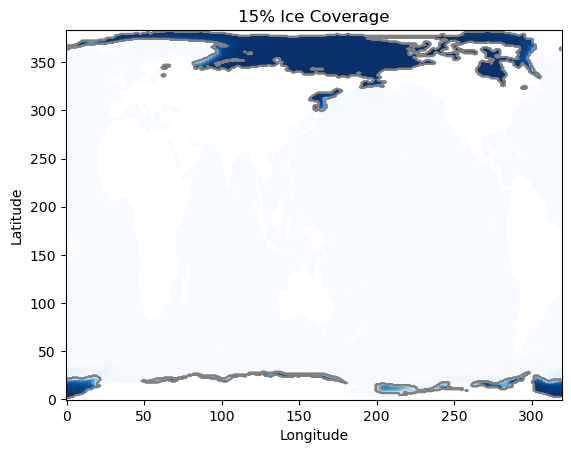

In [9]:
# Assuming ds is your xarray dataset
ice_area = ds_aice_march.aice.isel(time=0)  # Adjust the variable name accordingly
time_index = 0  # Adjust the time index as needed

# Create a binary mask where True indicates values greater than or equal to 0.15
mask = ice_area >= 0.15

# Plot the map with the 15% ice coverage indicated by a line
fig, ax = plt.subplots()
ice_area.plot(ax=ax, cmap='Blues', add_colorbar=False)
mask.plot.contour(ax=ax, colors=['gray'], linewidths=1)

plt.title(f'15% Ice Coverage')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()